## 1. Import Required Libraries

In [41]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os

# Set up matplotlib for better visualization
plt.rcParams['figure.figsize'] = (10, 6)

## 2. Load the Image

In [42]:
# Image path
image_path = 'assets/histogram/0057.png'

# Load the image
img_color = cv.imread(image_path)

if img_color is None:
    print(f"Error: Could not load image from {image_path}")
else:
    # Convert BGR (OpenCV format) to RGB (for proper display in matplotlib)
    img_rgb = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)

    # Convert to grayscale
    img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)

    print(f"Image loaded successfully!")

Image loaded successfully!


## 3. Display Original Image and Its Properties

Original Image Statistics:
  Min pixel value: 36
  Max pixel value: 255


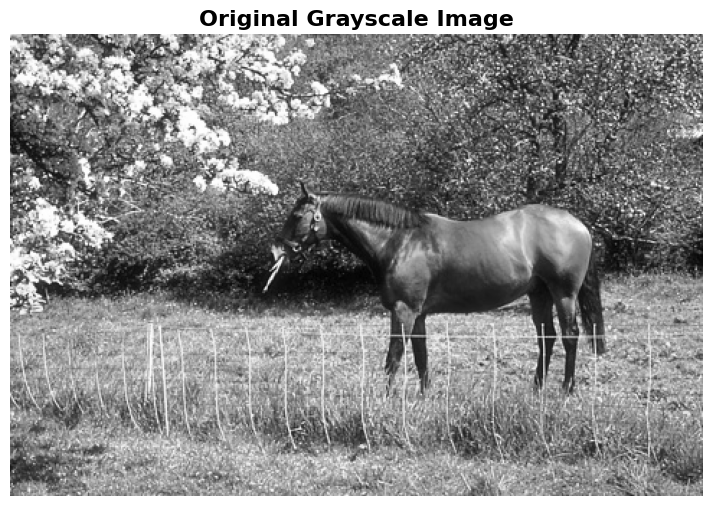

In [43]:
if 'img_gray' in locals():
    # Display image statistics
    print(f"Original Image Statistics:")
    print(f"  Min pixel value: {img_gray.min()}")
    print(f"  Max pixel value: {img_gray.max()}")

    # Display image
    plt.imshow(img_gray, cmap='gray')
    plt.title('Original Grayscale Image', fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.show()
else:
    print("Please load an image first.")

## 4. Display Original Histogram

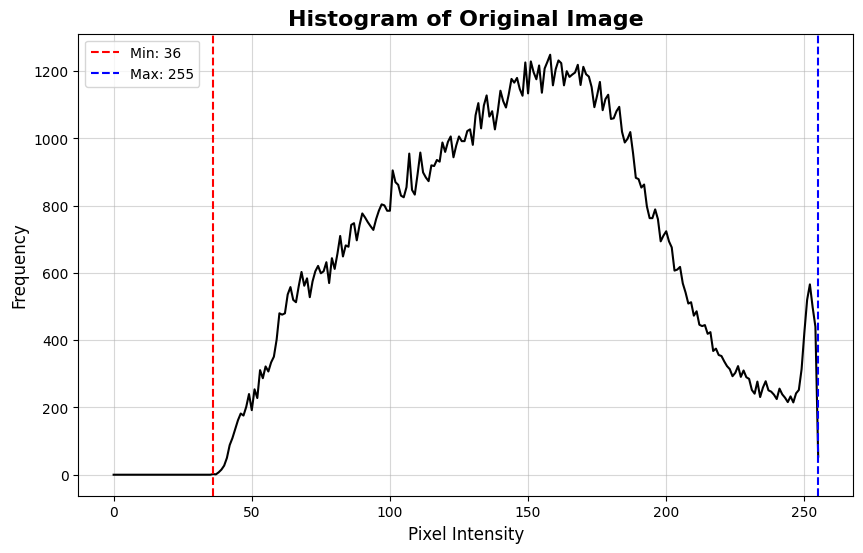

In [44]:
if 'img_gray' in locals():
    # Calculate histogram
    hist_original = cv.calcHist([img_gray], [0], None, [256], [0, 256])

    # Plot histogram
    plt.plot(hist_original, color='black')
    plt.title('Histogram of Original Image', fontsize=16, fontweight='bold')
    plt.xlabel('Pixel Intensity', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, alpha=0.5)
    plt.axvline(img_gray.min(), color='red', linestyle='--', label=f'Min: {img_gray.min()}')
    plt.axvline(img_gray.max(), color='blue', linestyle='--', label=f'Max: {img_gray.max()}')
    plt.legend()
    plt.show()
else:
    print("Please load an image first.")

## 5. Apply Histogram Stretching

In [45]:
def histogram_stretching(image):
    """
    Apply histogram stretching to an image.

    Parameters:
        image: Input grayscale image (numpy array)

    Returns:
        stretched_image: Image with stretched histogram
    """
    # Find min and max pixel values
    i_min = image.min()
    i_max = image.max()

    print(f"Stretching from range [{i_min}, {i_max}] to [0, 255]")

    # Apply stretching formula
    stretched = ((image - i_min) / (i_max - i_min) * 255).astype(np.uint8)

    return stretched

# Apply histogram stretching
if 'img_gray' in locals():
    img_stretched = histogram_stretching(img_gray)
    print("\nHistogram stretching applied successfully!")
else:
    print("Please load an image first.")

Stretching from range [36, 255] to [0, 255]

Histogram stretching applied successfully!


## 6. Display Stretched Image and Its Properties

Stretched Image Statistics:
  Min pixel value: 0
  Max pixel value: 255


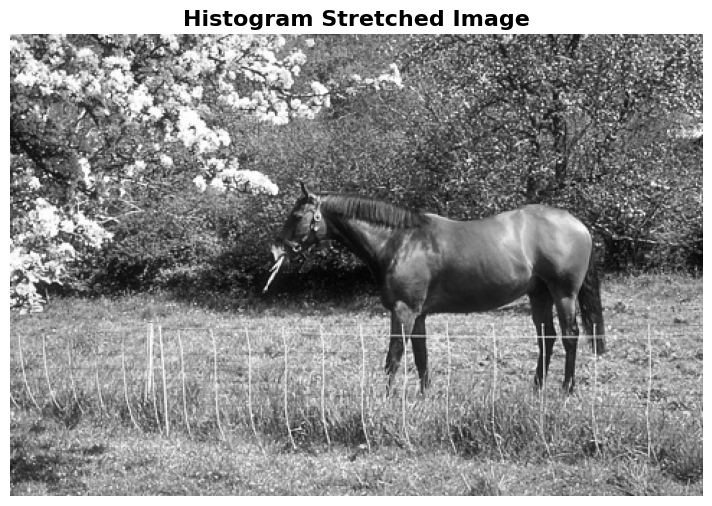

In [46]:
if 'img_stretched' in locals():
    # Display image statistics
    print(f"Stretched Image Statistics:")
    print(f"  Min pixel value: {img_stretched.min()}")
    print(f"  Max pixel value: {img_stretched.max()}")

    # Display image
    plt.imshow(img_stretched, cmap='gray')
    plt.title('Histogram Stretched Image', fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.show()
else:
    print("Please apply histogram stretching first.")

## 7. Display Stretched Histogram

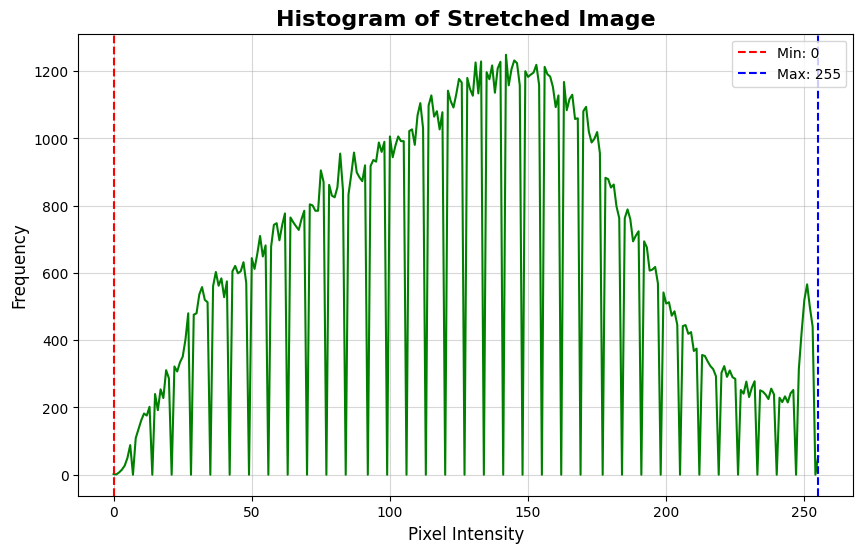

In [47]:
if 'img_stretched' in locals():
    # Calculate histogram of stretched image
    hist_stretched = cv.calcHist([img_stretched], [0], None, [256], [0, 256])

    # Plot histogram
    plt.plot(hist_stretched, color='green')
    plt.title('Histogram of Stretched Image', fontsize=16, fontweight='bold')
    plt.xlabel('Pixel Intensity', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, alpha=0.5)
    plt.axvline(img_stretched.min(), color='red', linestyle='--', label=f'Min: {img_stretched.min()}')
    plt.axvline(img_stretched.max(), color='blue', linestyle='--', label=f'Max: {img_stretched.max()}')
    plt.legend()
    plt.show()
else:
    print("Please apply histogram stretching first.")

## 8. Side-by-Side Comparison

Compare the original and stretched images along with their histograms.

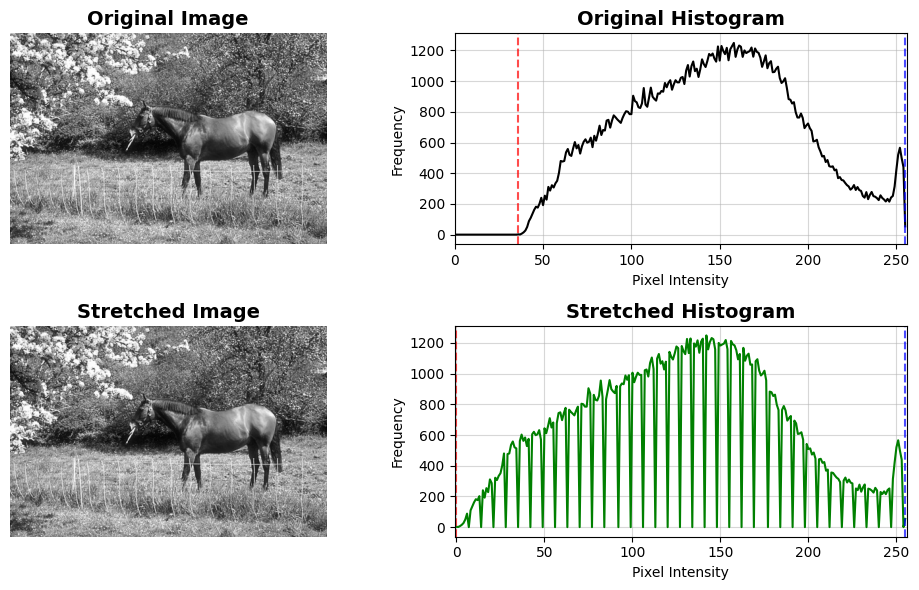

In [48]:
if 'img_gray' in locals() and 'img_stretched' in locals():
    fig, axes = plt.subplots(2, 2)

    # Original image
    axes[0, 0].imshow(img_gray, cmap='gray')
    axes[0, 0].set_title('Original Image', fontsize=14, fontweight='bold')
    axes[0, 0].axis('off')

    # Original histogram
    axes[0, 1].plot(hist_original, color='black', linewidth=1.5)
    axes[0, 1].set_title('Original Histogram', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Pixel Intensity')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_xlim([0, 256])
    axes[0, 1].grid(True, alpha=0.5)
    axes[0, 1].axvline(img_gray.min(), color='red', linestyle='--', alpha=0.7)
    axes[0, 1].axvline(img_gray.max(), color='blue', linestyle='--', alpha=0.7)

    # Stretched image
    axes[1, 0].imshow(img_stretched, cmap='gray')
    axes[1, 0].set_title('Stretched Image', fontsize=14, fontweight='bold')
    axes[1, 0].axis('off')

    # Stretched histogram
    axes[1, 1].plot(hist_stretched, color='green', linewidth=1.5)
    axes[1, 1].set_title('Stretched Histogram', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Pixel Intensity')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_xlim([-1, 256])
    axes[1, 1].grid(True, alpha=0.5)
    axes[1, 1].axvline(0, color='red', linestyle='--', alpha=0.7)
    axes[1, 1].axvline(255, color='blue', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
else:
    print("Please load an image and apply histogram stretching first.")